In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import csv, functools, operator,os, re
from datetime import datetime
import pandas as pd
import numpy as np 
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as ani

## Data Resources

### Govt Reosurces 

In [3]:
#Importing the datasets for covid cases in non-US countries 
data_dir = '/Users/jaodand/Dropbox/PostDoc/Jobs:Fellowships/TDI/JHU/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports' # to read all csv files
data_files = functools.reduce(operator.add, [glob(pattern) for pattern in [
    "%s/*.csv*"%data_dir]])

#Sorting the files by dates of generation
data_files.sort(key=lambda f: datetime.strptime(re.split('\.|/',f)[-2], "%m-%d-%Y"))

In [4]:
keys_filenames = [(re.split('\.|/',f)[-2]) for f in data_files]

In [5]:
#Get column names in the latest public datasets from JHU. 
df_exp = pd.read_csv(data_files[-1], sep=',', compression=None, header='infer') #first experimental dataset to play with for the latest date
cols = list(df_exp) 

In [6]:
#Get the complete public datasets from JHU. 
df = pd.concat(map(functools.partial(pd.read_csv, sep=',',header='infer'), 
                   data_files),join_axes=[df_exp.columns],keys=keys_filenames)

/Users/jaodand/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
df_Ind = df[df['Country_Region'].str.contains("India", na=False)]

### Volunteer Resource

In [8]:
data_dir_vol = '/Users/jaodand/Dropbox/PostDoc/Jobs:Fellowships/TDI/JHU/COVID-19/Crowd_sourced_data/'
data_files_vol = functools.reduce(operator.add, [glob(pattern) for pattern in [
    "%s/*raw_*.csv*"%data_dir_vol]])

#Sorting the files by dates of generation
data_files_vol.sort(key=lambda f: int(re.split('\.|/', f)[-2][8:]))


In [9]:
#Get column names in the latest public datasets from JHU. 
df_exp_vol = pd.read_csv(data_files_vol[-1], header='infer') #first experimental dataset to play with for the latest date
cols_vol = list(df_exp_vol)

print(cols_vol)

['Entry_ID', 'State Patient Number', 'Date Announced', 'Age Bracket', 'Gender', 'Detected City', 'Detected District', 'Detected State', 'State code', 'Num Cases', 'Current Status', 'Contracted from which Patient (Suspected)', 'Notes', 'Source_1', 'Source_2', 'Source_3', 'Nationality', 'Type of transmission', 'Status Change Date', 'Patient Number']


In [10]:
keys_filenames_vol = [re.split('\.|/', f)[-2] for f in data_files_vol]

df_vol = pd.concat(map(functools.partial(pd.read_csv, sep=',',header='infer'), 
                   data_files_vol),join_axes=[df_exp_vol.columns],keys=keys_filenames)

/Users/jaodand/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  after removing the cwd from sys.path.


### Covid cases  across different provinces

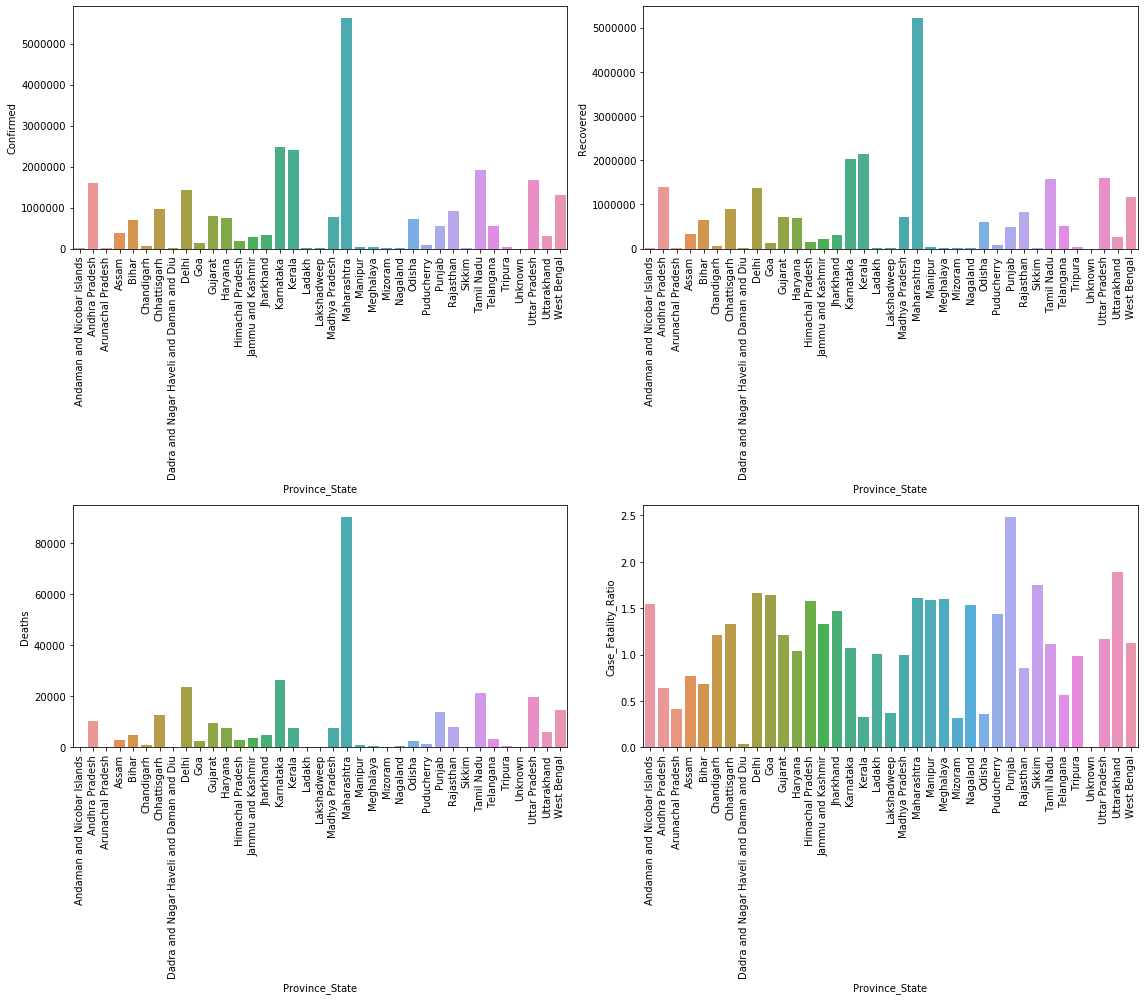

In [11]:
#Lets start with a basic plot for latest data for India
plt.figure()
plt.subplot(2,2,1)
df_exp_Ind = df_exp[df_exp['Country_Region'].str.contains("India", na=False)]
ax = sns.barplot(x="Province_State", y="Confirmed", data=df_exp_Ind)


plt.xticks(rotation = 90)
plt.subplot(2,2,2)
ax = sns.barplot(x="Province_State", y="Recovered", data=df_exp_Ind)



plt.xticks(rotation = 90)
plt.subplot(2,2,3)
ax = sns.barplot(x="Province_State", y="Deaths", data=df_exp_Ind)
plt.xticks(rotation = 90)


plt.subplot(2,2,4)
ax = sns.barplot(x="Province_State", y="Case_Fatality_Ratio", data=df_exp_Ind)
plt.xticks(rotation = 90)

plt.subplots_adjust(hspace=1.75)
plt.gcf().set_size_inches(16,14)
plt.tight_layout()
plt.savefig('Statewise.pdf')
plt.show()


### Covid cases using crowdsourced data for different provinces

In [12]:
print(cols_vol)

['Entry_ID', 'State Patient Number', 'Date Announced', 'Age Bracket', 'Gender', 'Detected City', 'Detected District', 'Detected State', 'State code', 'Num Cases', 'Current Status', 'Contracted from which Patient (Suspected)', 'Notes', 'Source_1', 'Source_2', 'Source_3', 'Nationality', 'Type of transmission', 'Status Change Date', 'Patient Number']


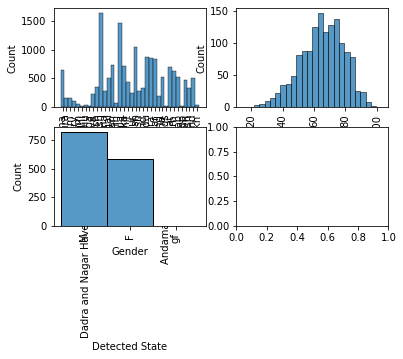

In [ ]:
#Lets start with a basic plot for latest data for India

plt.figure()
plt.subplot(2,2,1)
df_exp_Ind_vol = df_exp_vol[df_exp_vol['Detected State'].notna()]
ax = sns.histplot(data=df_exp_Ind_vol, x="Detected State",)
plt.xticks(rotation = 90)


plt.subplot(2,2,2)
df_exp_Ind_vol = df_exp_vol[df_exp_vol['Age Bracket'].notna()]
ax = sns.histplot(data=df_exp_Ind_vol, x="Age Bracket",)
plt.xticks(rotation = 90)

plt.subplot(2,2,3)
df_exp_Ind_vol = df_exp_vol[df_exp_vol['Gender'].notna()]
ax = sns.histplot(data=df_exp_Ind_vol, x="Gender",)
plt.xticks(rotation = 90)

plt.subplot(2,2,4)
df_exp_Ind_vol = df_exp_vol[df_exp_vol['Detected District'].notna()]
ax = sns.barplot(x="Detected District",y="Num Cases",data=df_exp_Ind_vol)
plt.xticks(rotation = 90)


plt.subplots_adjust(hspace=1.75)
plt.gcf().set_size_inches(16,14)
plt.tight_layout()
plt.savefig('Demographic_Vol.pdf')

plt.show()